In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns", None)
df=pd.read_csv(r"data\scfp2022.csv")
print(df.shape)
df.head()

(22975, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACECL5,RACECL_EX,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,BNPL,NOBNPL,HBNPL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,840,0.0,38804.734469,0.0,0.0,54.045591,0.0,38804.734469,0.0,6377.379759,38804.734469,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,6700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6400,1,0,0,0,0,0,0,13100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41800,0,0,0,0,0,0,245000,0,0,0,245000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49000.0,1,0,49000.0,1.262733,0,0,0,258100,1,25000,1,0,0,1,1,0,0,0,1,1,1,0,674000,1,1,0,0,0.0,0,0,0,0,0,0,0,699000.0,1,25000.0,957100.0,1,0,195000,195000,479000,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195000,1,762100.0,0.203740,5.025160,65000.0,0.0,0.0,0.0,0,65000.0,1600.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,1600.0,1600.0,0.0,0.0,0.494785,0.494785,0.0,0.0,1,195000,0,0,0,0,0,0,0,195000,0,0,0,0,0,0,0,0,0,0,0,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,960,0.0,38264.278557,0.0,0.0,54.045591,0.0,37183.366733,0.0,4756.012024,38264.278557,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,

In [5]:
# subsetting to household that has been turned down or feared being turned down
df_fear=df[df["TURNFEAR"]==1]
df_fear.shape

(3839, 356)

# Explore

### Age

In [6]:
age_group=df_fear["AGECL"].unique()
print("Age groups:", age_group)

Age groups: [1 4 2 3 5 6]


In [7]:
# for readability
age_dict={1:"under 35",
          2:"35-44",
          3:"45-54",
          4:"55-64",
          5:"65-74",
          6:"75 or older",}

age_cl=df_fear["AGECL"].replace(age_dict)

print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head()

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (3839,)


20    under 35
21    under 35
22    under 35
23    under 35
24    under 35
Name: AGECL, dtype: object

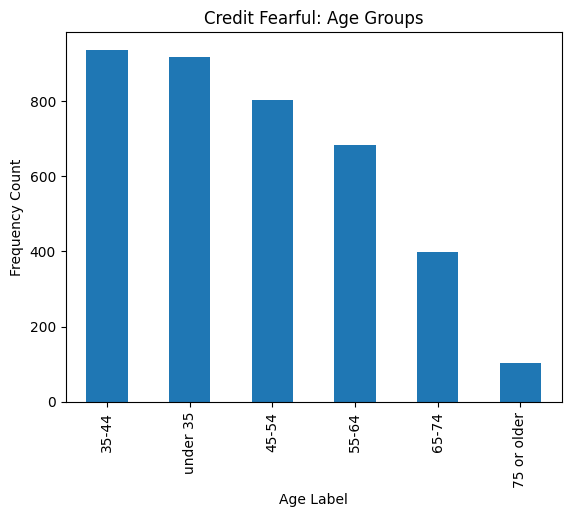

In [8]:
# looking at the distribution of groups
age_cl_value_counts=age_cl.value_counts()

age_cl_value_counts.plot(kind="bar", xlabel="Age Label", ylabel="Frequency Count", title="Credit Fearful: Age Groups");

plt.savefig("age_group.jpg")

The graphs tells us that most of the people who fears being turned downed or have been turned down in the past are younger.These are the people who are younger than 35  to 44 years old.

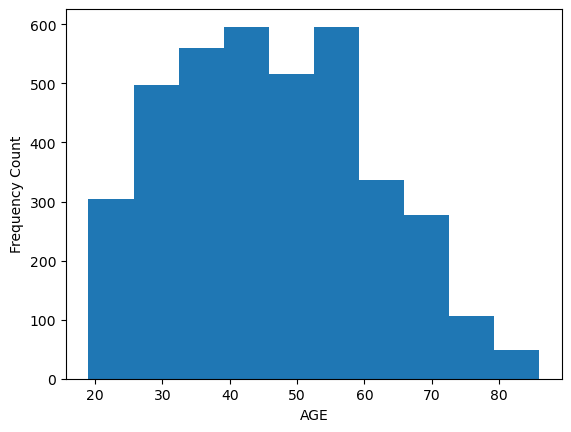

In [7]:
df_fear["AGE"].hist(bins=10, grid=False)
plt.xlabel("AGE")
plt.ylabel("Frequency Count");

Younger people are more concern about securing a loan than older people.

### Race

In [8]:
race_group=df_fear["RACE"].unique()
print("Age groups:", race_group)

Age groups: [2 1 3 5 4]


In [9]:
# for readability
race_dict={1:"white non-Hispanic",
          2:"black / African American",
          3:"Hispanic",
          4:"Asian",
          5:"Other",
          }

race_cl=df_fear["RACE"].replace(race_dict)

print("age_cl type:", type(race_cl))
print("age_cl shape:", race_cl.shape)
race_cl.unique()

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (3839,)


array(['black / African American', 'white non-Hispanic', 'Hispanic',
       'Other', 'Asian'], dtype=object)

In [10]:
race_value_counts=race_cl.value_counts(normalize=True)
race_value_counts

RACE
white non-Hispanic          0.386559
black / African American    0.337327
Hispanic                    0.206043
Asian                       0.050274
Other                       0.019797
Name: proportion, dtype: float64

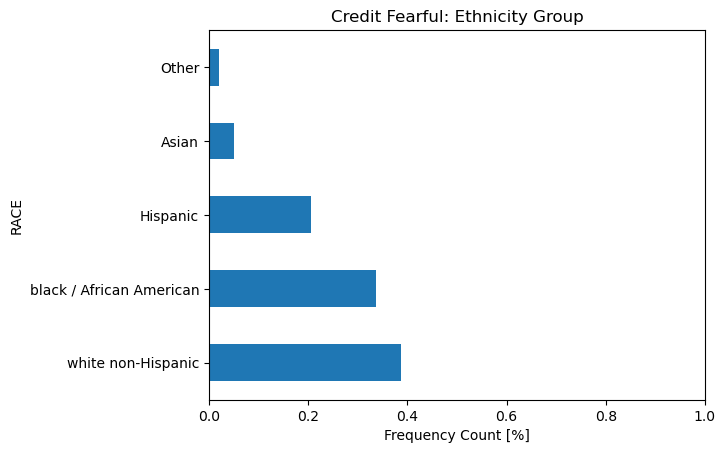

In [11]:
race_value_counts=race_cl.value_counts(normalize=True)
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency Count [%]")
plt.title("Credit Fearful: Ethnicity Group");

In [12]:
looking at the entire

SyntaxError: invalid syntax (3902304027.py, line 1)

In [13]:
# for readability
race_dict={1:"white non-Hispanic",
          2:"black / African American",
          3:"Hispanic",
          4:"Asian",
          5:"Other",
          }

race_df=df["RACE"].replace(race_dict)
race_df

0              white non-Hispanic
1              white non-Hispanic
2              white non-Hispanic
3              white non-Hispanic
4              white non-Hispanic
                   ...           
22970    black / African American
22971    black / African American
22972    black / African American
22973    black / African American
22974    black / African American
Name: RACE, Length: 22975, dtype: object

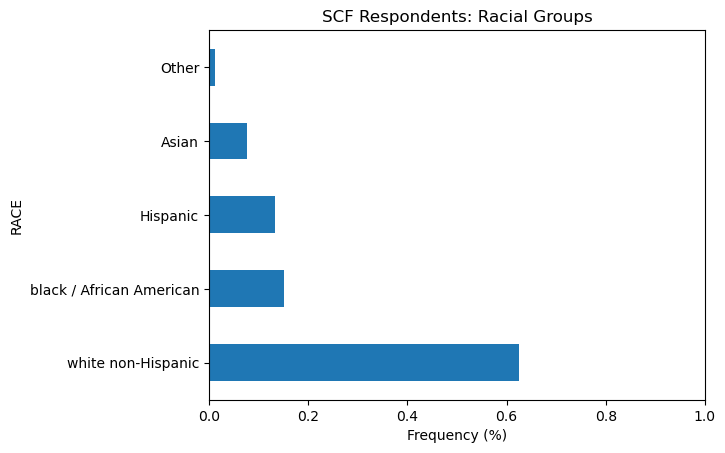

In [14]:
race_value_counts=race_df.value_counts(normalize=True)
race_value_counts.plot(kind="barh")
plt.xlim((0,1))
plt.xlabel("Frequency (%)")
plt.title("SCF Respondents: Racial Groups");

### Income

In [15]:
income_cat=df_fear["INCCAT"].unique()
print("Income category", income_cat)

Income category [3 2 1 4 5 6]


In [16]:
# for readability
income_dict={1 :"0-20",
           2 : "20-39.9",
           3 : "40-59.9",
           4 : "60-79.9",
           5 : "80-89.9",
           6 : "90-100",}

income_df=(df["INCCAT"]
           .replace(income_dict)
           .groupby(df["TURNFEAR"])
           .value_counts(normalize=True)
           .to_frame()
           .reset_index()
           .rename(columns={"proportion":"Frequency"}))
income_df

,TURNFEAR,INCCAT,Frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,20-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,20-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


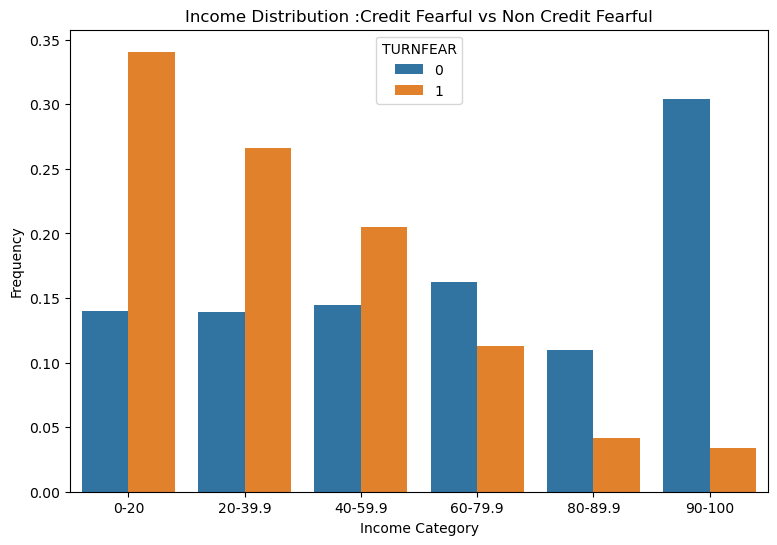

In [17]:
fig, ax=plt.subplots(figsize=(9,6))
sns.barplot(x="INCCAT", y="Frequency", hue="TURNFEAR", data=income_df, order=income_dict.values())
plt.xlabel("Income Category")
plt.title("Income Distribution :Credit Fearful vs Non Credit Fearful" );

The credit fearful group is much more common in the lower income category

### Assets

In [18]:
# looking at the correlation for Asset and house for the entire dataset
df["ASSET"].corr(df["HOUSES"])

0.561776546509548

In [19]:
# looking at the correlation for Asset and house for the credit fearful subgroup
df_fear["ASSET"].corr(df_fear["HOUSES"])

0.3649545427641164

In [20]:
cols=["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr=df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561777,0.706685,0.307143,0.120139
HOUSES,0.561777,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307143,0.251876,0.306534,1.000000,0.086561
EDUC,0.120139,0.186120,0.096549,0.086561,1.000000


There's a strong positive relationship betwen income and assert. It seemes like people with high income have high number of asserts and visa versa people with low income have low number of asserts.

In [21]:
cols=["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr=df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364955,0.893282,0.477171,0.110659
HOUSES,0.364955,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110659,0.195174,0.108845,0.182570,1.000000


Looking at the relationship between Houses and DEBT, it seems like most debts in the fearful group comes from Houses they own. Another noticeable relationshi is between Asset and Income variable. There is a strong relationship between these 2 variables, the higher the income the higher the number of assert owned orm

### Education

In [22]:
df_educ=(df['EDUC'].groupby(df["TURNFEAR"])
        .value_counts(normalize=True)
        .rename("Frequency")
        .to_frame()
        .reset_index())
df_educ.head()

,TURNFEAR,EDUC,Frequency
0,0,12,0.278689
1,0,8,0.174383
2,0,13,0.158967
3,0,9,0.111727
4,0,14,0.108539


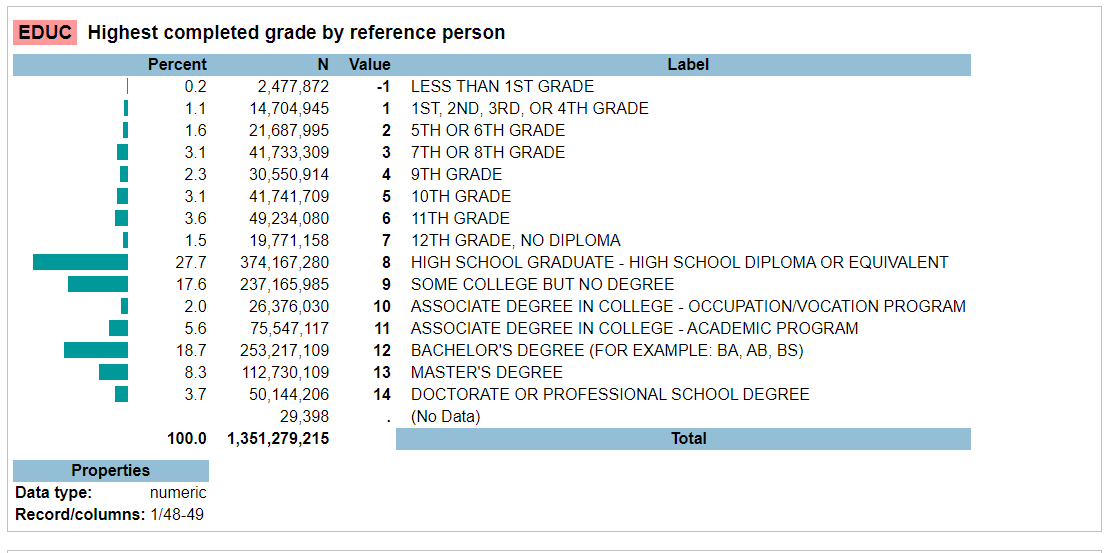

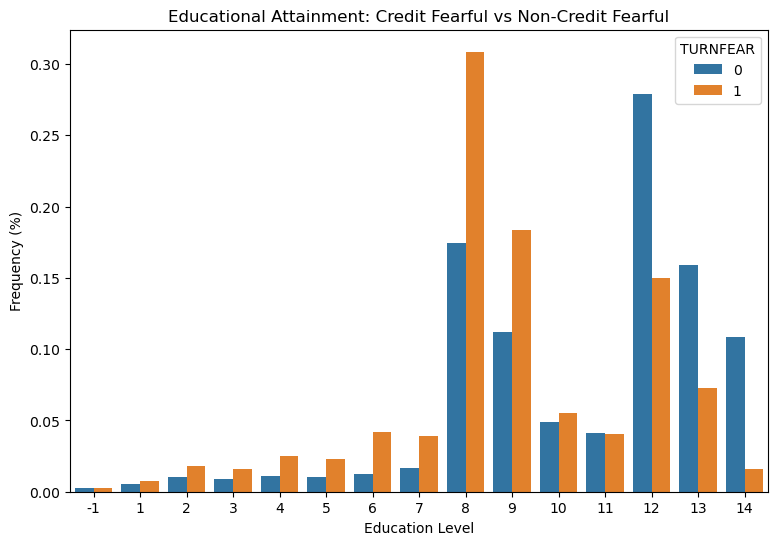

In [23]:
fig, ax=plt.subplots(figsize=(9,6))
sns.barplot(x="EDUC", y="Frequency", hue="TURNFEAR", data=df_educ)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs Non-Credit Fearful");

A much high proportion of credit fearful group has only a high school diploma.

### Looking at the relationship between numeric variables

### Debt vs ASSET

<Axes: xlabel='DEBT', ylabel='ASSET'>

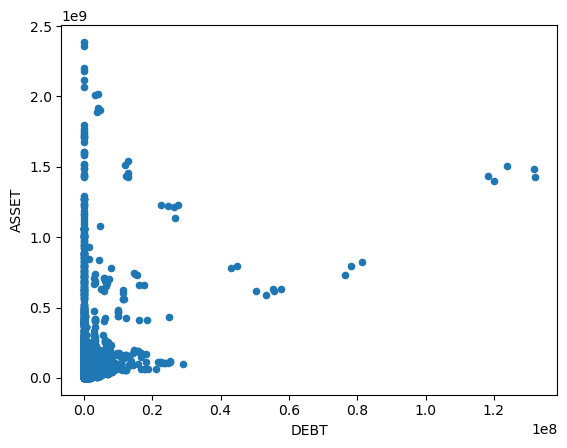

In [24]:
df.plot.scatter(x="DEBT", y="ASSET")

<Axes: xlabel='DEBT', ylabel='ASSET'>

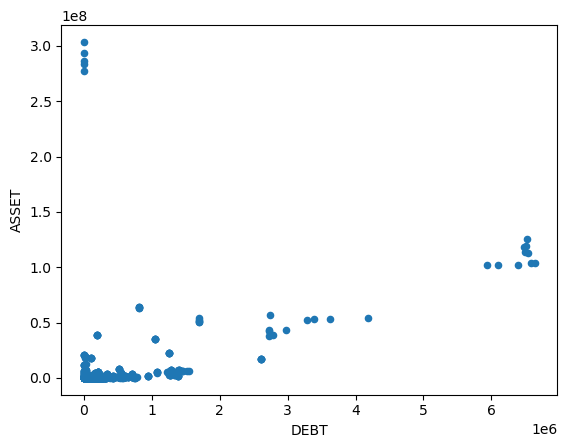

In [27]:
df_fear.plot.scatter(x="DEBT", y="ASSET")

### DEBT vs HOUSES

<Axes: xlabel='DEBT', ylabel='HOUSES'>

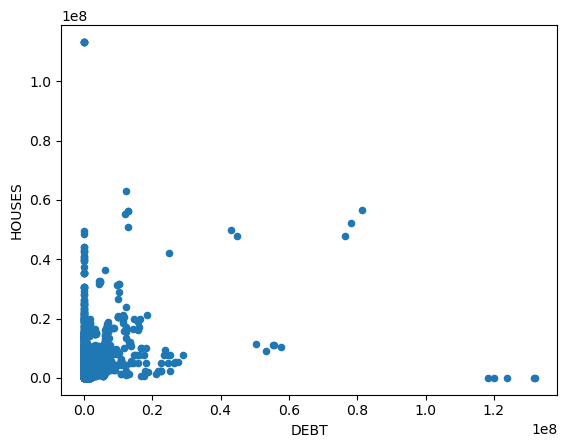

In [28]:
df.plot.scatter(x="DEBT", y="HOUSES")

<Axes: xlabel='DEBT', ylabel='HOUSES'>

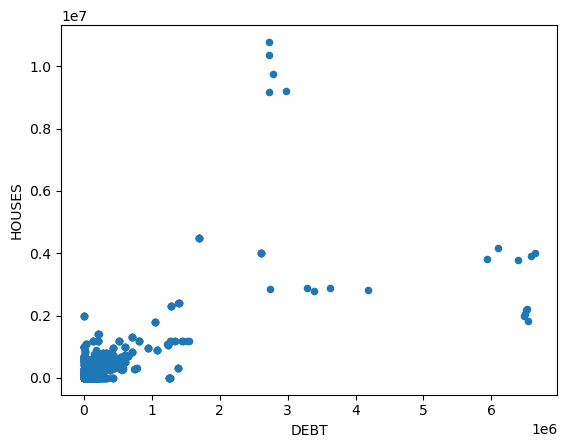

In [29]:
df_fear.plot.scatter(x="DEBT", y="HOUSES")